# A Simple Data Analysis Example

The example shows how to do basic data analysis of the datasets. The example uses 2021 Fairfax County Virginia traffic stop data to analyze race/ethnicity values.

In [1]:
import openpolicedata as opd
import pandas as pd
import numpy as np

In [7]:
agency_comp = "Fairfax County Police Department"
year = 2021
src = opd.Source(source_name="Virginia")
t_ffx = src.load(table_type='STOPS', date=year, agency=agency_comp)

# Make a copy of the table so that we can make changes without changing the original table.
df_ffx = t_ffx.table.copy()

# Race and ethnicity are saved in different columns in Virginia's data but analysis is typically done on a combined race/ethnicity column
# containing Hispanic of all races, White Non-Hispanic, Black Non-Hispanic, Asian Non-Hispanic, etc. groups.
# Create combined race/ethnicity category
df_ffx["race_eth"] = df_ffx["RACE"]   # Default the value of the race/ethnicity to the race

# For all rows where the ethnicity is HISPANIC, set "race_eth" column to HISPANIC
df_ffx.loc[df_ffx["ETHNICITY"] == "HISPANIC", "race_eth"] = "HISPANIC"
# For all rows where the ethnicity is UNKNOWN, set "race_eth" column to UNKNOWN
df_ffx.loc[df_ffx["ETHNICITY"] == "UNKNOWN", "race_eth"] = "UNKNOWN"

# Find the number of searches of persons by race and ethnicity
# groupby groups the rows of the table based on ["person_searched","race_eth"]
# size() finds the number of rows in each group (i.e. the number of searches for each race/ethnicity group)
# unstack just makes the resulting table more presentable
searches = df_ffx.groupby(["PERSON SEARCHED","race_eth"]).size().unstack("race_eth")

searches

race_eth,AMERICAN INDIAN OR ALASKA NATIVE,ASIAN OR NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,BLACK OR AFRICAN AMERICAN,UNKNOWN,WHITE
PERSON SEARCHED,,,,,
NO,92,1619,4192,3405,12934
YES,3,121,934,40,1809


Let's find the percent of stops that end in the person being searched for each race/ethnicity group

In [8]:
# The total number of searches for each group is the sum of each column
number_of_stops = searches.sum()
# The number of searches for each group is the number of Yes's for each group
number_of_searches = searches.loc["YES"]

# Calculate the search rate (% of people search over total people stopped)
percent_stops_with_search = np.round(number_of_searches/number_of_stops*100,1)

# Create a DataFrame out of the 3 metrics calculated above
searches_df = pd.DataFrame([number_of_stops, number_of_searches, percent_stops_with_search], 
    index=["# of Stops", "# of Searches", "% of Stops With Search"])
searches_df = searches_df.transpose()
searches_df["# of Stops"] = searches_df["# of Stops"].astype(int)
searches_df["# of Searches"] = searches_df["# of Searches"].astype(int)
# searches.dropna(inplace=True)
searches_df

,# of Stops,# of Searches,% of Stops With Search
race_eth,,,
AMERICAN INDIAN OR ALASKA NATIVE,95,3,3.2
ASIAN OR NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,1740,121,7.0
BLACK OR AFRICAN AMERICAN,5126,934,18.2
UNKNOWN,3445,40,1.2
WHITE,14743,1809,12.3


Text(0.5, 1.0, 'Percentage of Stops Where the Person is Searched')

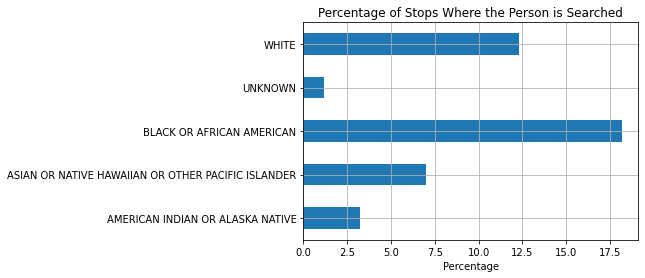

In [9]:
ax = searches_df.plot.barh(y="% of Stops With Search", grid=True, legend=False)
ax.set_ylabel("")
ax.set_xlabel("Percentage")
ax.set_title("Percentage of Stops Where the Person is Searched")